# Exploratory Data Analysis of Show Reviews

In this notebook I'm going to explore the reviews' dataset.

## Imports

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
SEED = 42


## Functions

In [66]:
def plot_per_type(dataframe: pd.DataFrame, column: str, title: str, bins: int = 10):
    f, ax = plt.subplots(1, 2, figsize=(10, 5))

    dataframe[dataframe["type"] == "movie"][column].plot.hist(
        ax=ax[0], edgecolor="black", color="red", bins=bins
    )
    ax[0].set_title("Type = movie")

    dataframe[dataframe["type"] == "series"][column].plot.hist(
        ax=ax[1], edgecolor="black", color="green", bins=bins
    )
    ax[1].set_title("Type = series")

    f.tight_layout()
    f.suptitle(title, y=1.0)
    plt.show()


In [159]:
def plot_dt_per_type(
    dataframe: pd.DataFrame,
    column: str,
    title: str,
    bins: int = 24,
):
    f, ax = plt.subplots(1, 2, figsize=(14, 5))

    dataframe[dataframe["type"] == "movie"][column].hist(
        ax=ax[0], edgecolor="black", color="red", bins=np.arange(bins + 1) - 0.5
    )
    ax[0].set_title("Type = movie")
    ax[0].set_xticks(range(bins), minor=False)
    ax[0].grid(visible=None)

    dataframe[dataframe["type"] == "series"][column].hist(
        ax=ax[1], edgecolor="black", color="green", bins=np.arange(bins + 1) - 0.5
    )
    ax[1].set_title("Type = series")
    ax[1].set_xticks(range(bins), minor=False)
    ax[1].grid(visible=None)

    f.suptitle(title, y=1.0)

    plt.show()


## Paths

In [4]:
relative_path = os.path.join("../../../", "data")
cleaned_reviews_path = os.path.join(relative_path, "2_cleaned_reviews")


## Data

### Loading data

In [5]:
reviews = pd.read_parquet(os.path.join(cleaned_reviews_path, "reviews.parquet"))
reviews.shape


(206737, 9)

### Dataset overview

In [6]:
reviews.sample(n=10, random_state=SEED)


,show_id,user_id,type,datetime,sentiment,subtitle,review,review_score,score
196236,257386,28525,series,2010-08-27 11:23:00,positive,Вечный город.,К истории Древнего мира у меня отношение особо...,40,NaN
128582,688832,44953,movie,2015-02-20 23:19:00,negative,50 оттенков разочарования,"Говорю сразу, книги читала все, да и по нескол...",5,3.0
159673,349,33910,movie,2018-04-15 21:04:00,positive,"Господи, спасибо, что не пронесло мимо","Есть два типа фильмов, мой друг. Одни ты прост...",4,NaN
109244,686898,44065,movie,2019-11-09 11:58:00,neutral,Что же стало с клоуном?,"Итак, в первую очередь хотелось бы отметить то...",2,6.5
92610,61455,66782,movie,2017-11-27 18:52:00,positive,Они отказываются подчиняться,"Автора этого замечательного фильма, Джосса Уэд...",5,NaN
43727,491724,44563,movie,2012-01-28 23:18:00,positive,Жестокая правда,"Финчер снова нас поразил, он всегда нас поража...",7,10.0
50195,102130,67145,movie,2009-08-17 11:56:00,positive,"Преодолеть 2 года жизни, что встретиться","Слышал о фильме много, и в основном положитель...",11,10.0
43651,491724,66283,movie,2012-02-19 15:33:00,negative,"Мужчины, которые ненавидели женщин.",Я попробовала рассматривать этот фильм с двух ...,3,6.0
48775,7226,7905,movie,2014-02-20 03:44:00,positive,None,"«Догвилль» - это один из тех редких фильмов, п...",3,10.0
75262,458,33255,movie,2013-06-22 21:14:00,positive,Тайна закрытой двери,Я имела счастье смотреть этот мультфильм в кин...,6,10.0


## EDA

### Descriptive statistics

In [7]:
reviews.shape[0]


206737

Overall, users left `206 737` reviews.  

In [8]:
reviews[["show_id", "user_id"]].nunique()


show_id     1862
user_id    69172
dtype: int64

The number of unique users that left reviews is `69172`. While the number of unique shows (movies/series) is `1862`.

`171 094` reviews were left for movies, which is approximately `83%`.

In [9]:
reviews["type"].value_counts()


movie     171094
series     35643
Name: type, dtype: int64

### Users

Let's look at the activity of the users

In [10]:
number_of_reviews_per_user_per_type = (
    reviews.groupby("type")
    .agg({"user_id": "value_counts"})
    .rename(columns={"user_id": "reviews_per_user"})
    .reset_index()
)

In [11]:
number_of_reviews_per_user_per_type.groupby("type")["reviews_per_user"].describe(
    percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
)


,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,99.9%,max
type,,,,,,,,,,,,,,
movie,58114.0,2.944110,8.693822,1.0,1.0,1.0,1.0,1.0,2.0,5.0,9.0,30.0,127.887,494.0
series,20465.0,1.741656,3.254028,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,12.0,38.536,150.0


As we can see, on average, users leave 3 reviews, but the median value is equal to 1 review.  
It means that we have a lot of outliers - people, who leave enormous amounts of reviews.

In [16]:
number_of_reviews_per_user_per_type_cut = number_of_reviews_per_user_per_type[
    number_of_reviews_per_user_per_type["reviews_per_user"] <= 9
]

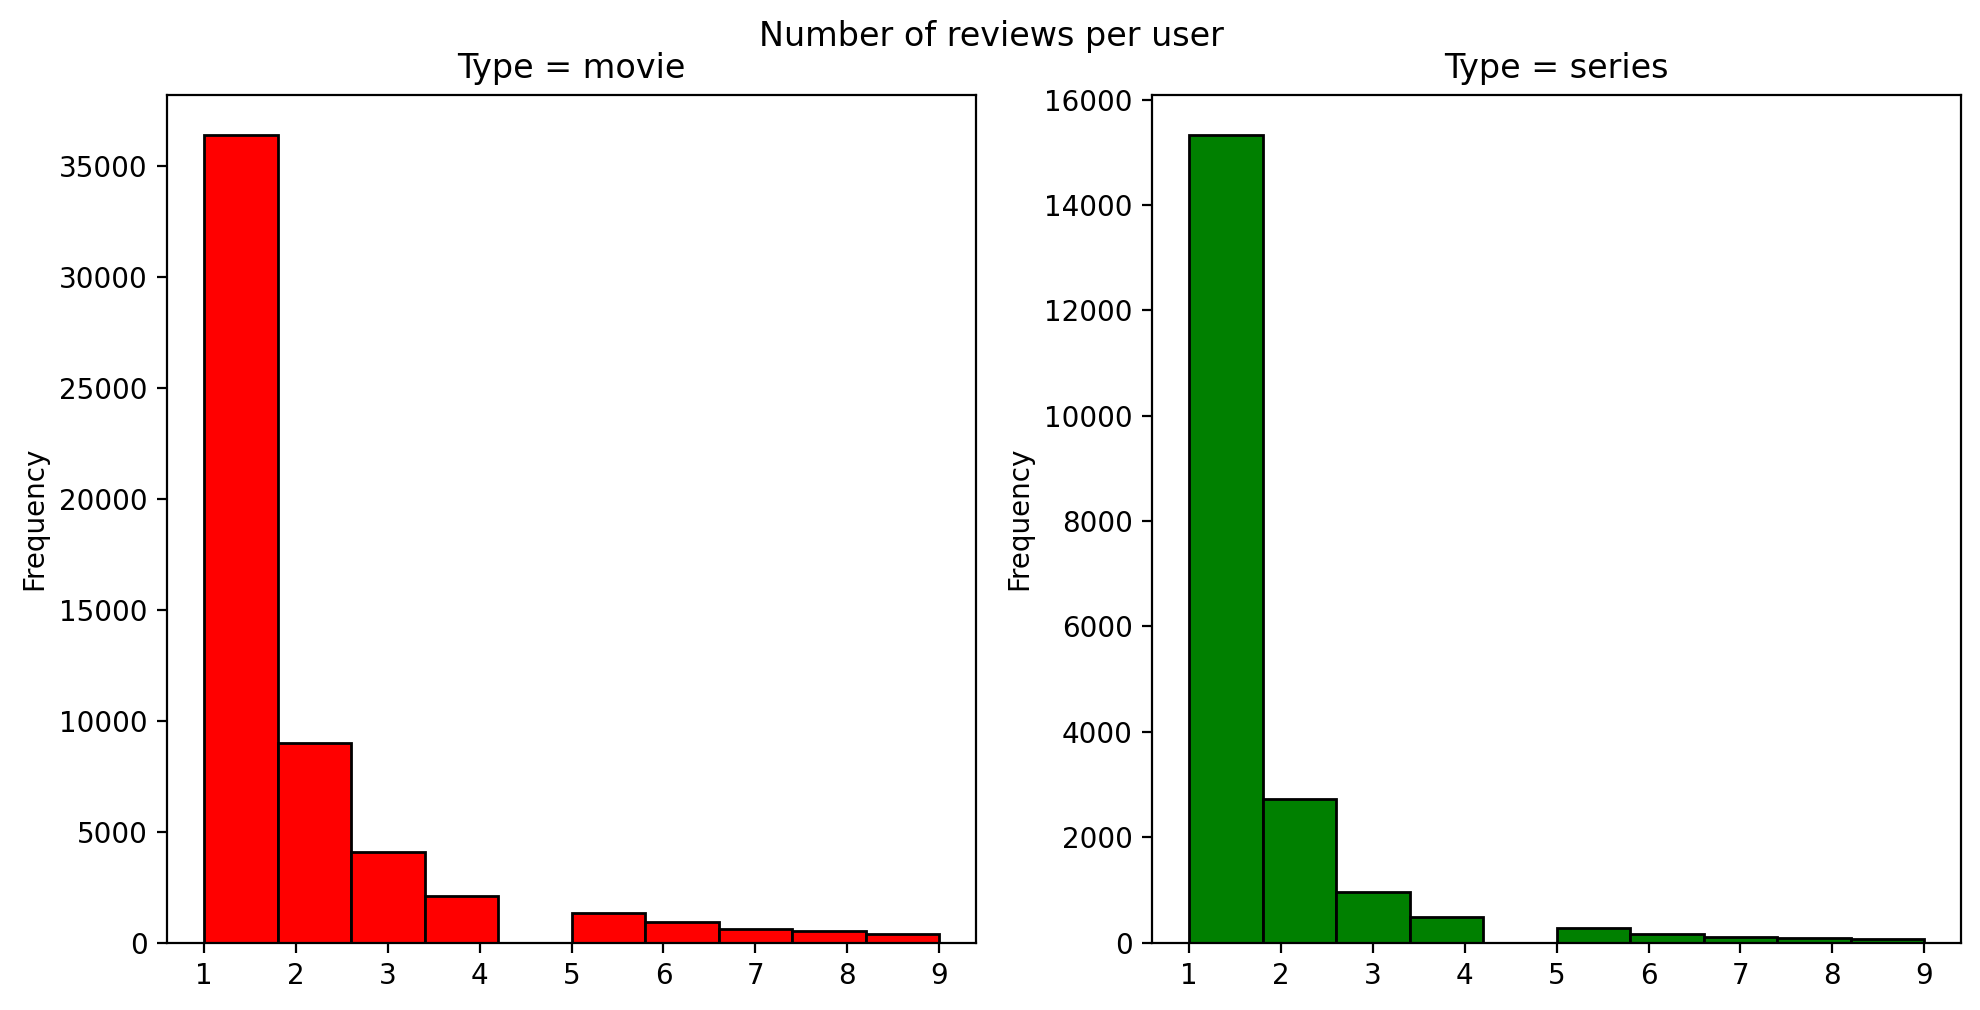

In [67]:
plot_per_type(
    dataframe=number_of_reviews_per_user_per_type_cut,
    column="reviews_per_user",
    title="Number of reviews per user",
)

We can see that most of the users leave from 1 to 4 reviews and the distribution of reviews does not differ for movies and series.

### Reviews

Let's analyze the popularity of the shows.

In [35]:
number_of_reviews_per_user_per_type = (
    reviews.groupby("type")
    .agg({"show_id": "value_counts"})
    .rename(columns={"show_id": "reviews_per_show"})
    .reset_index()
)

In [36]:
number_of_reviews_per_user_per_type.groupby("type")["reviews_per_show"].describe(
    percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
)


,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,99.9%,max
type,,,,,,,,,,,,,,
movie,947.0,180.669483,210.445283,1.0,1.0,7.0,35.0,123.0,253.0,400.0,578.4,945.56,1771.462,2200.0
series,915.0,38.954098,69.856888,1.0,1.0,3.0,6.0,16.0,43.0,87.6,137.6,378.40,658.332,715.0


On average, people leave approximately 181 reviews per movie and 39 reviews per series.

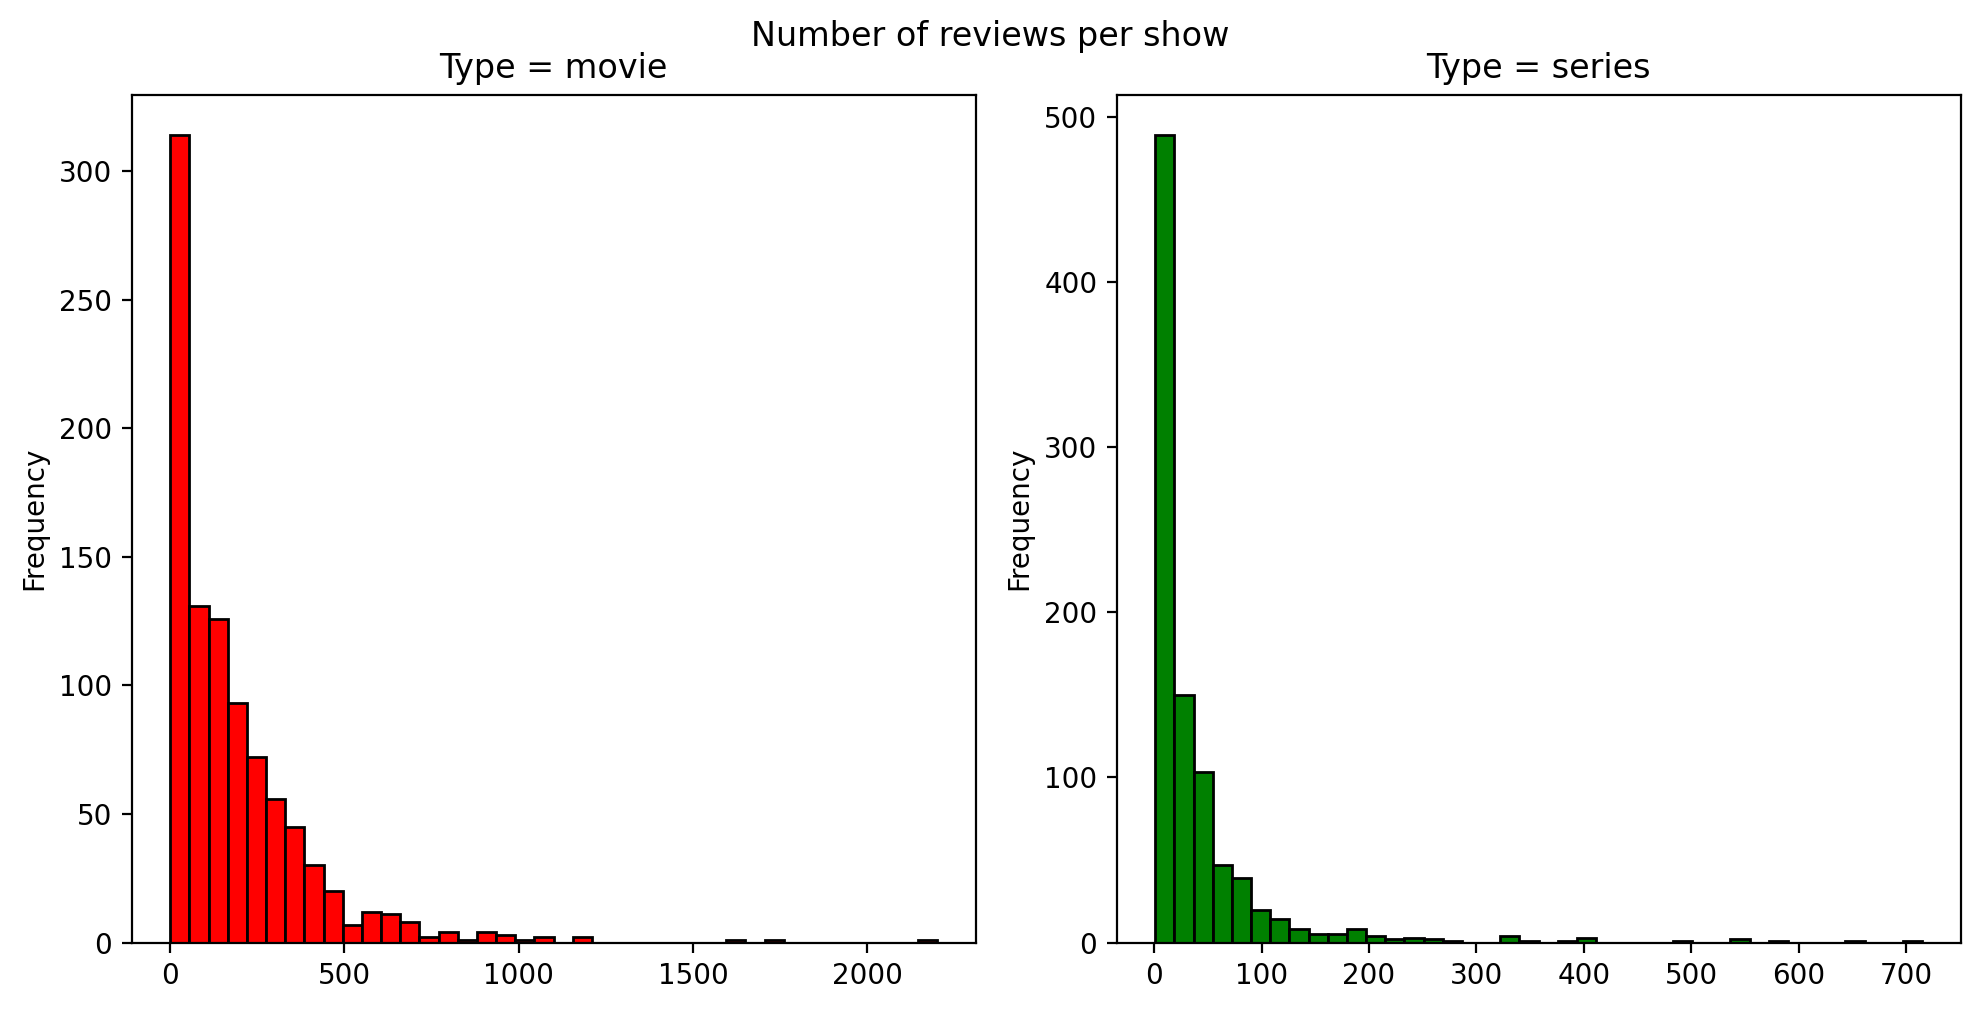

In [68]:
plot_per_type(
    dataframe=number_of_reviews_per_user_per_type,
    column="reviews_per_show",
    title="Number of reviews per show",
    bins=40,
)

Here we see expected pattern - there are few movies, which have a lot of reviews.

### Date and time of review

In [176]:
reviews["hour"] = reviews["datetime"].dt.hour
reviews["weekday"] = reviews["datetime"].dt.weekday
reviews["month"] = reviews["datetime"].dt.month - 1


#### Hour distribution

Let's look at hour distribution

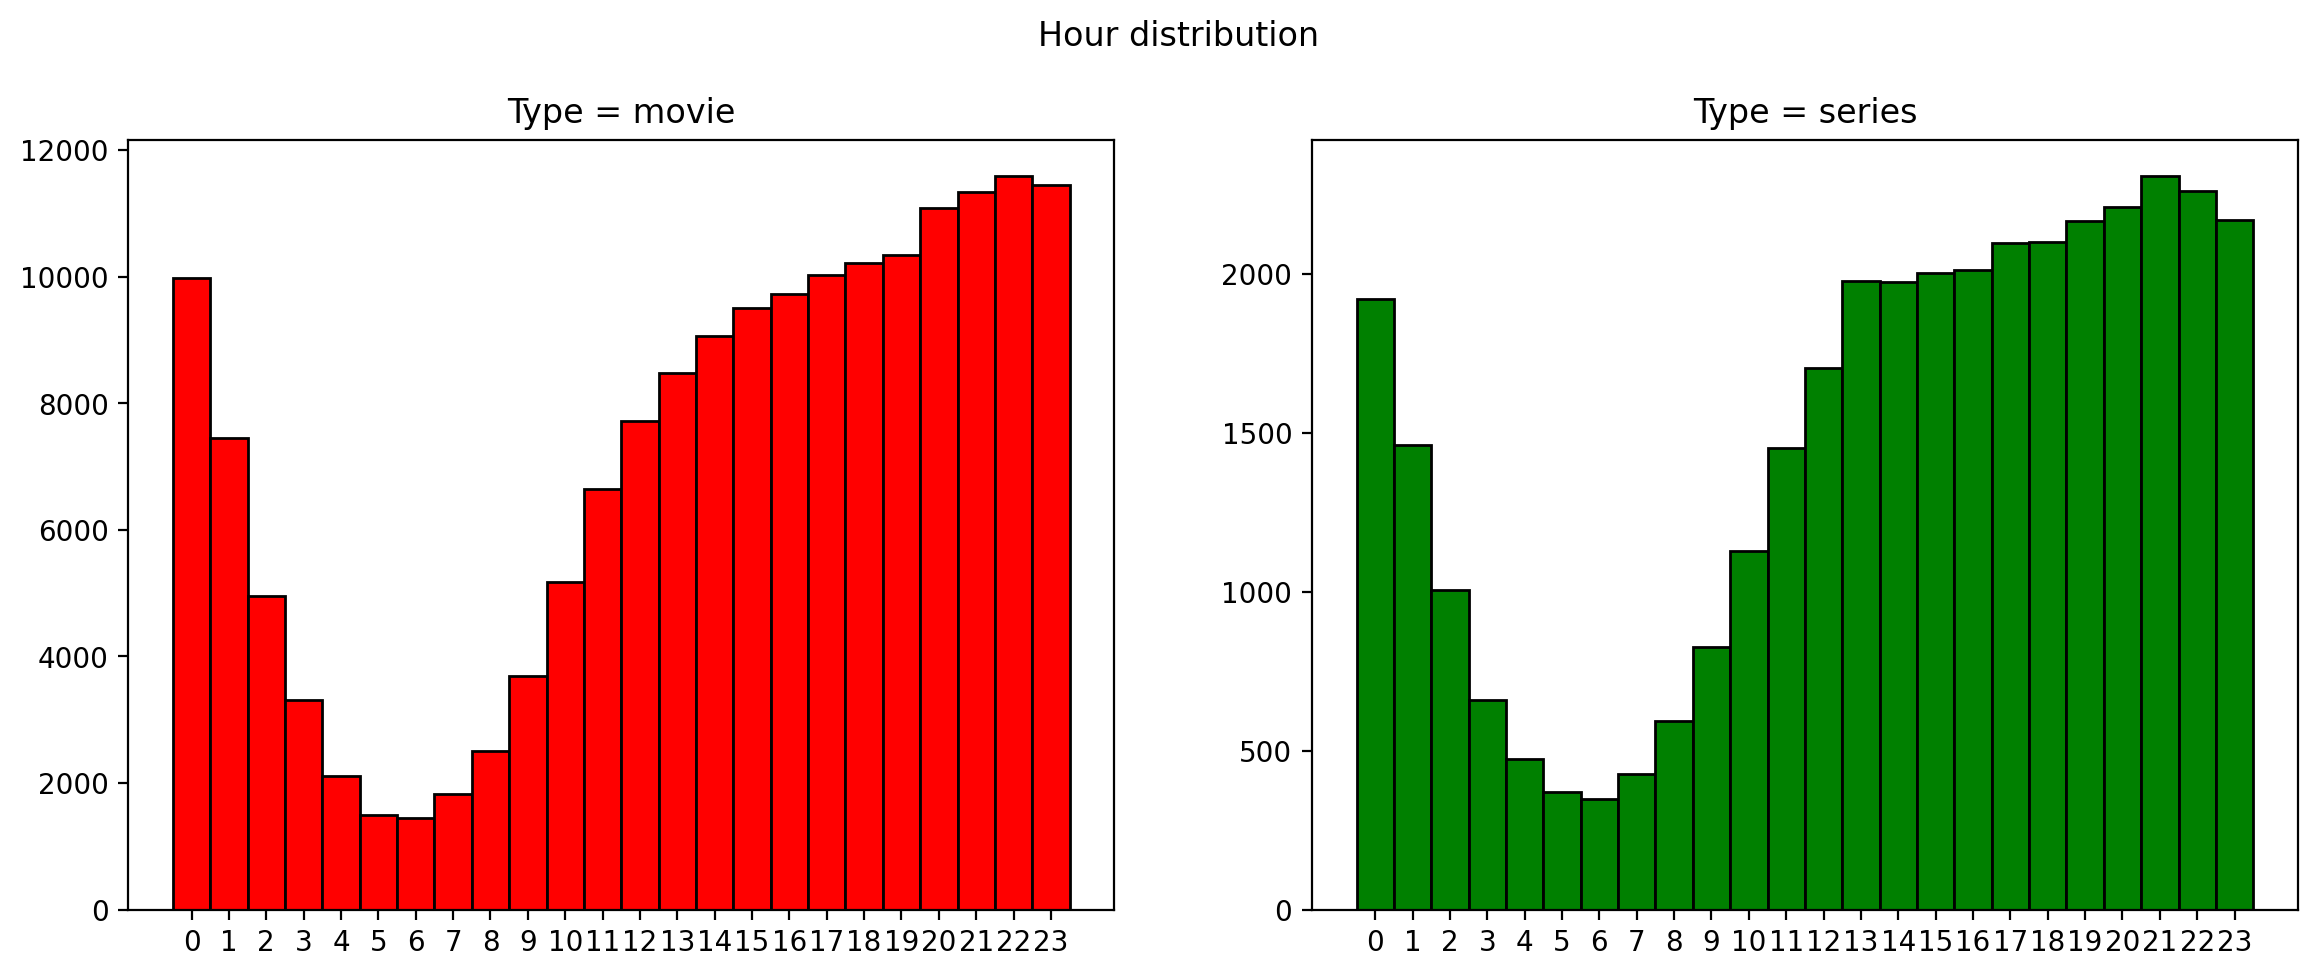

In [160]:
plot_dt_per_type(
    dataframe=reviews,
    column="hour",
    title="Hour distribution",
)


People tend to publish reviews closer to the night with absolute maximum around 20-23 o'clock and absolute minimum around 4-7 o'clock.  
Although, I'm not sure whether timezone was taken into account (all data is +3 UTC) or these dates and times are distributed along 11 time zones.  

Let's think that we have dates and times, which were actual for the people when they left their reviews.

##### Weekday distribution

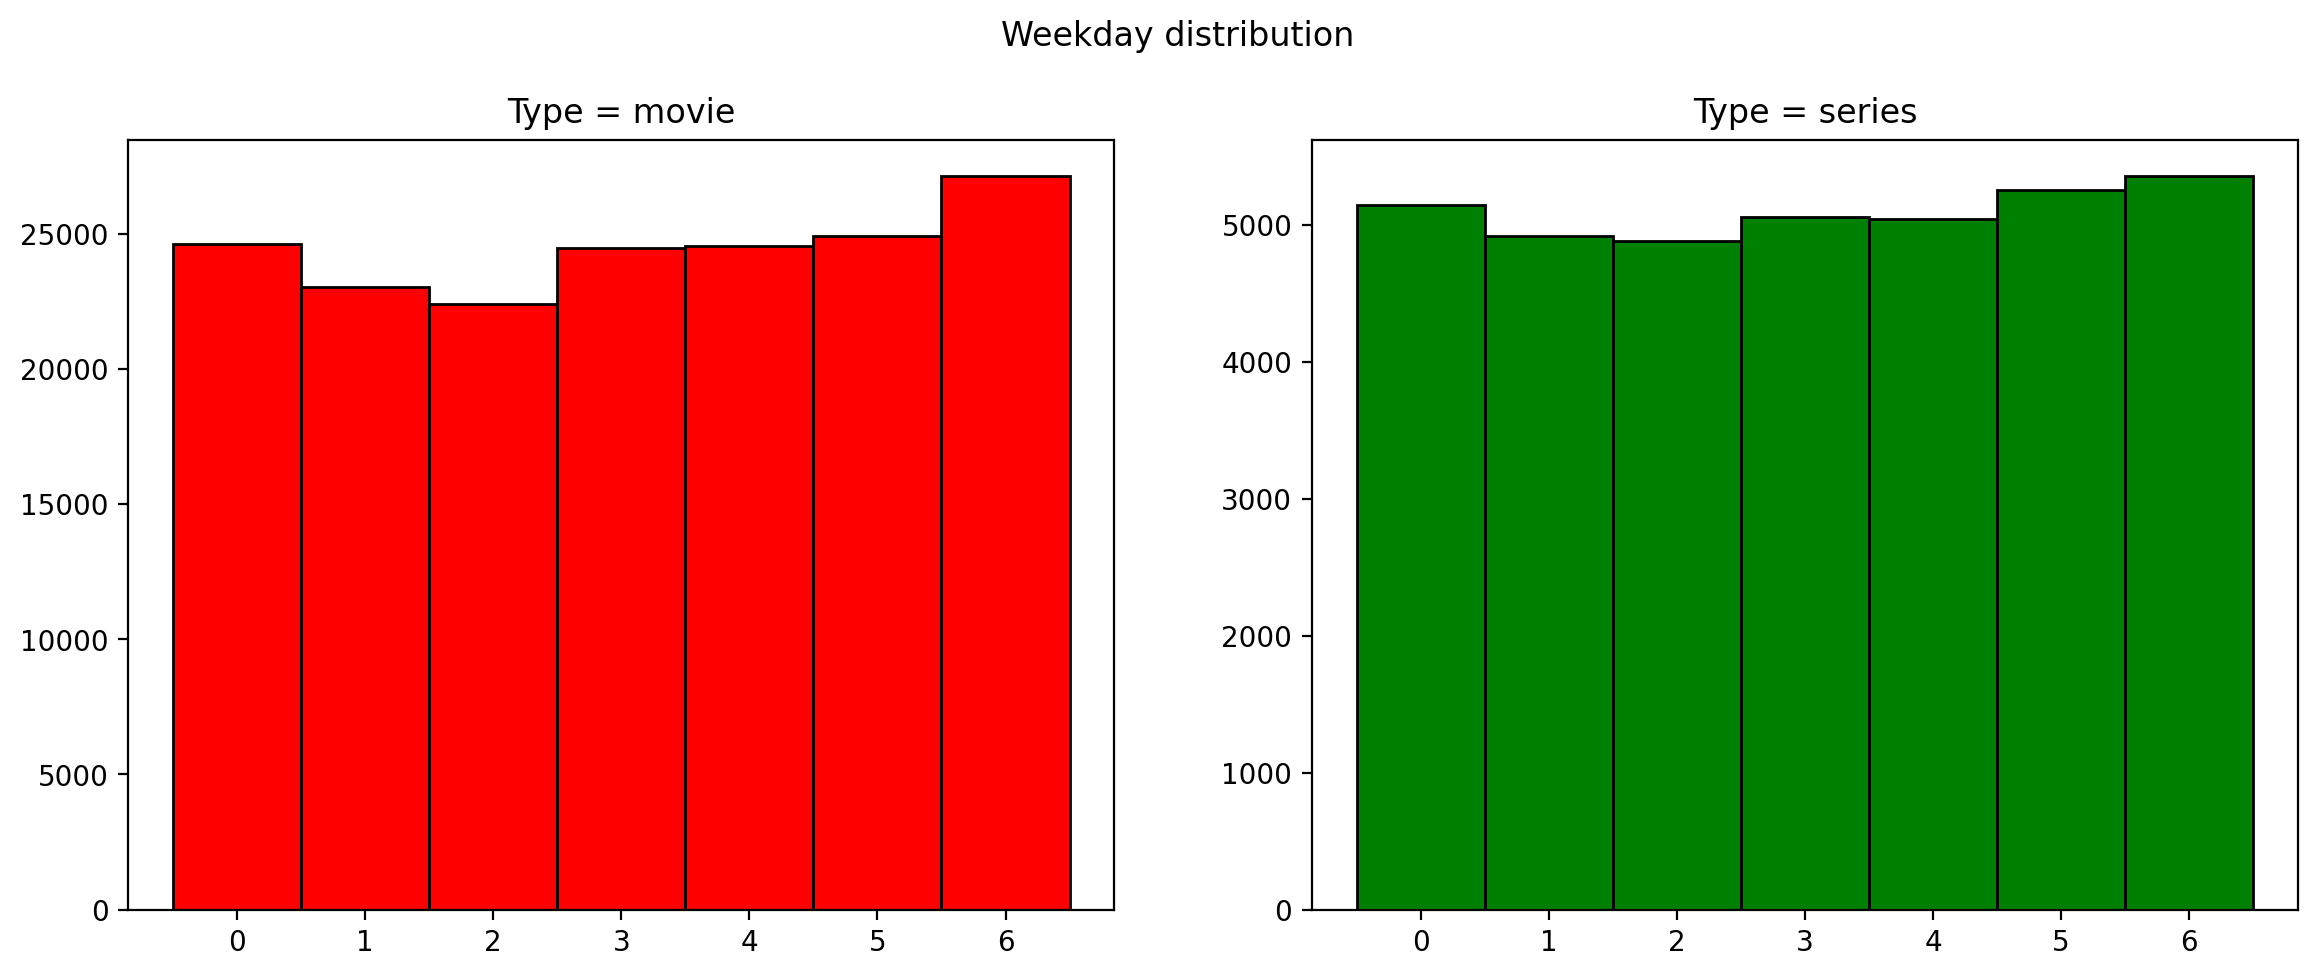

In [170]:
plot_dt_per_type(
    dataframe=reviews, column="weekday", title="Weekday distribution", bins=7
)

People tend to publish more reviews on Sundays, but between Mondays, Thursdays, Fridays and Saturdays the difference is not that significant

##### Month distribution

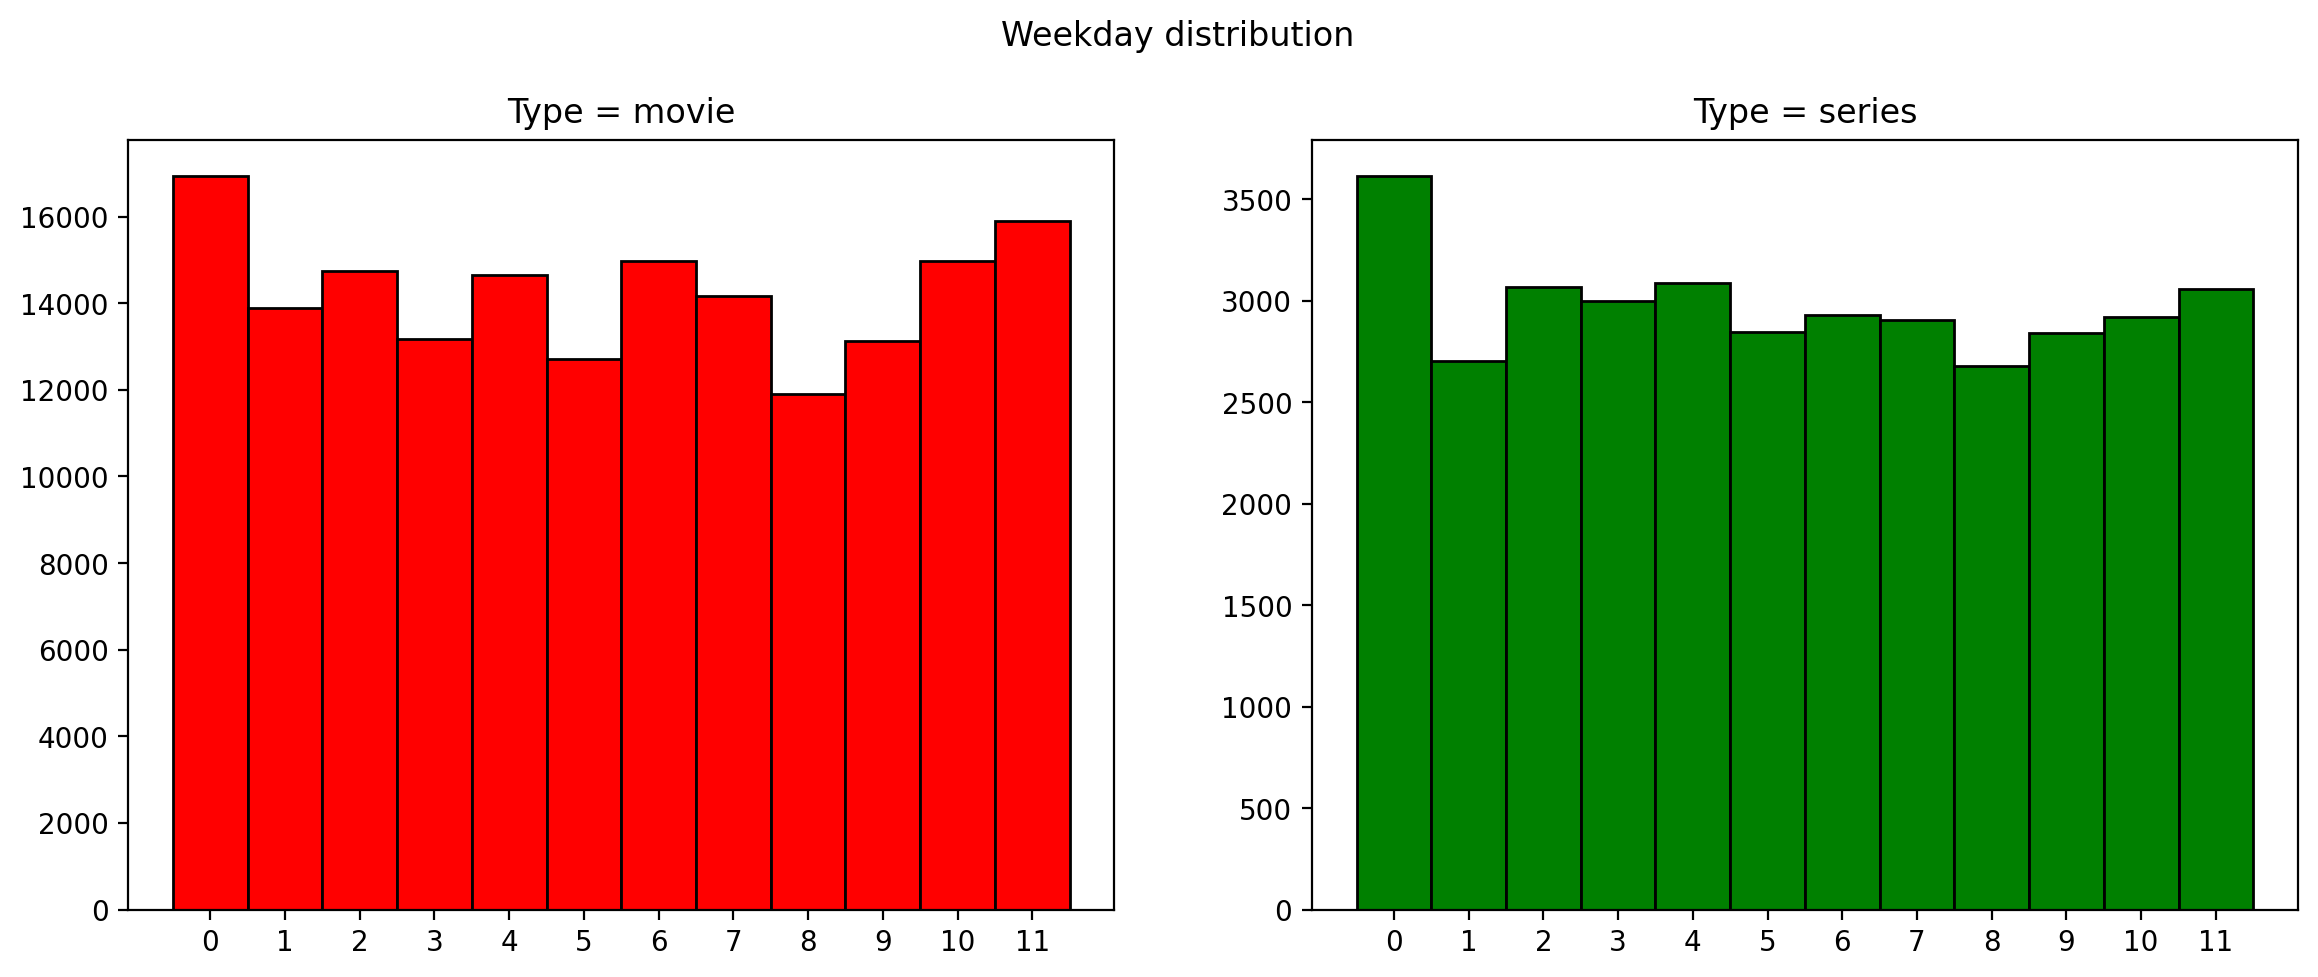

In [177]:
plot_dt_per_type(
    dataframe=reviews, column="month", title="Weekday distribution", bins=12
)

People tend to publish more reviews on winter months (especially on January). It can be caused by the number of holidays in Russia on January and, also, generally correlated with cold weather.